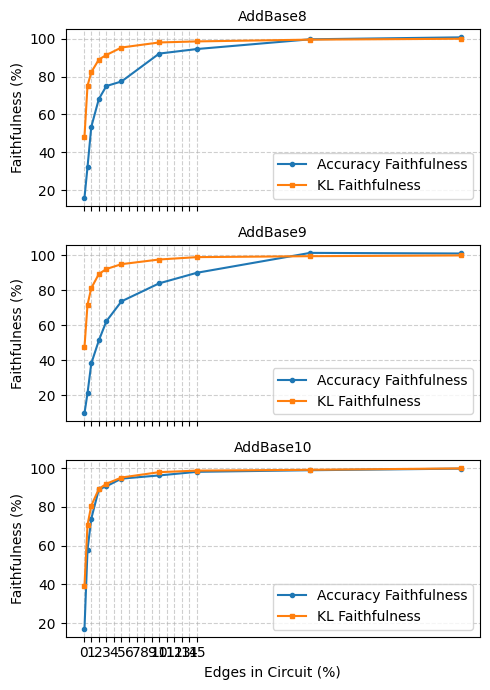

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np 

plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

with open("pruning_results.json", "r") as f:
    data = json.load(f)

fig, axes = plt.subplots(3, 1, figsize=(5, 7), sharex=True)  

for i, exp in enumerate(data):
    ax = axes[i] if len(data) > 1 else axes

    x = [r["percentage_prune"] for r in exp["results"]]
    y1 = [(r["metrics"]["graph_accuracy"] / r["metrics"]["model_accuracy"]) * 100 for r in exp["results"]]
    y2 = [r["metrics"]["percentage_performance_kl"] for r in exp["results"]]
    ax.plot(x, y1, marker="o", markersize=3, label="Accuracy Faithfulness")
    ax.plot(x, y2, marker="s", markersize=3, label="KL Faithfulness")

    label = exp["adapter_path"].split("/")[-3]
    ax.set_ylabel("Faithfulness (%)")
    ax.set_title(f"{label}")
    ax.grid(True, which="both", linestyle="--", alpha=0.6)

    xticks = np.arange(0, 0.16, 0.01)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(t*100)}" for t in xticks])
    ax.legend()
    

axes[-1].set_xlabel("Edges in Circuit (%)")

plt.tight_layout()
plt.savefig('addbase_graph_faith.pdf', format='pdf', dpi=600)
plt.show()

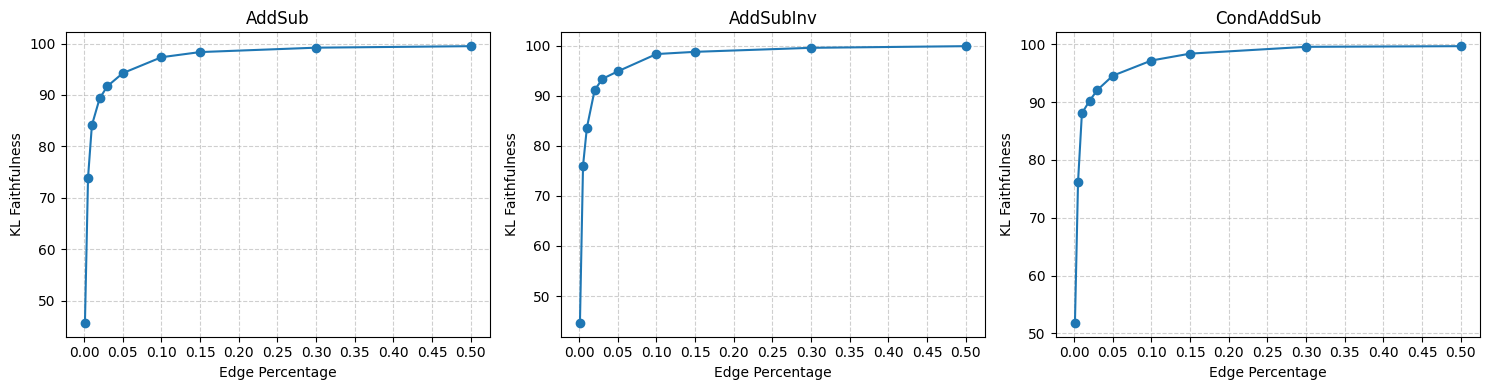

In [22]:
with open("pruning_results.json", "r") as f:
    data = json.load(f)

fig, axes = plt.subplots(1, len(data), figsize=(5 * len(data), 4))

for i, exp in enumerate(data):
    ax = axes[i] if len(data) > 1 else axes

    x = [r["percentage_prune"] for r in exp["results"]]
    y = [r["metrics"]["percentage_performance_kl"] for r in exp["results"]]

    ax.plot(x, y, marker="o")
    label = exp["adapter_path"].split("/")[-3]
    ax.set_xlabel("Edge Percentage")
    ax.set_ylabel("KL Faithfulness")
    ax.set_title(f"{label}")
    ax.grid(True, which="both", linestyle="--", alpha=0.6)

    ax.set_xticks(np.arange(0, 0.55, 0.05))

plt.tight_layout()
plt.show()

In [ ]:
import json
import numpy as np

with open("pruning_results_addsub.json", "r") as f:
    data = json.load(f)

prune_target = 0.05

for exp in data:
    x = [r["percentage_prune"] for r in exp["results"]]
    kl_y = [r["metrics"]["percentage_performance_kl"] for r in exp["results"]]
    graph_acc_y = [(r["metrics"]["graph_accuracy"] / r["metrics"]["model_accuracy"]) * 100 
                   for r in exp["results"]]

    closest_idx = np.argmin(np.abs(np.array(x) - prune_target))
    kl_at_5 = kl_y[closest_idx]
    graph_acc_at_5 = graph_acc_y[closest_idx]
    diff = kl_at_5 - graph_acc_at_5

    label = exp["adapter_path"].split("/")[-3]
    print(f"{label}: KL = {kl_at_5:.3f}, Graph Accuracy = {graph_acc_at_5:.3f}, Difference = {diff:.3f}")

AddSub: KL = 94.239, Graph Accuracy = 91.434, Difference = 2.805
AddSubInv: KL = 94.862, Graph Accuracy = 92.579, Difference = 2.283
CondAddSub: KL = 94.562, Graph Accuracy = 84.381, Difference = 10.181
